# OpenCV-Python

### （1）颜色转换

颜色空间的转换，颜色转换函数是cv2.cvtColor()。

常见色彩空间包括GRAY、XYZ、YCrCb、HSV、HLS、CIEL*a*b*、CIEL*u*v*、Bayer。
人眼视觉系统（HVS, Human Visual System）对颜色的敏感度要低于对亮度的敏感度。
在传统的RGB色彩空间内，RGB三原色具有相同的重要性，但是忽略了亮度信息。
在YCrCb色彩空间中，Y代表光源的亮度，Cr表示红色分量信息，Cb表示蓝色分量信息。
HSV（色调hue，饱和度saturation，亮度value）是面向视觉感知的颜色模型。
色调是指光的颜色，饱和度是指色彩的深浅程度。
H（hue）、L（lightness，明度）、S（saturation）
CIEL*a*b*中的L*表示亮度，a*表示从红色到绿色的范围，b*表示从黄色到蓝色的范围。
CIEL*u*v*色彩空间同CIEL*a*b*色彩空间一样，都是均匀的颜色模型。
Bayer色彩空间（Bayer模型）被广泛地应用在CCD和CMOS相机中。

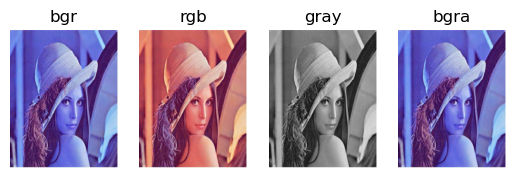

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena.jpg")  # OpenCV默认原始图像是BGR格式
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # BGR转gray
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR转RGB
bgra_img = cv.cvtColor(img, cv.COLOR_BGR2BGRA)  # BGR转换为BGRA，A是透明度。
b, g, r, a = cv.split(bgra_img)

# 以子图的方式显示图像
plt.subplot(1, 4, 1), plt.title("bgr"), plt.axis("off")
plt.imshow(img)
plt.subplot(1, 4, 2), plt.title("rgb"), plt.axis("off")
plt.imshow(rgb_img)
plt.subplot(1, 4, 3), plt.title("gray"), plt.axis("off")
plt.imshow(gray_img, cmap="gray")  # cmap参数表示以灰度图显示
plt.subplot(1, 4, 4), plt.title("bgra"), plt.axis("off")
plt.imshow(bgra_img)
plt.show()

### （2）位平面分解、图像加密解密和数字水印。

位平面分解原理介绍：

8个比特位的灰度图像按照比特位可分为8个位平面，每个平面是二进制图像。
在8位灰度图中，每一个像素使用8位二进制值来表示，其值的范围在[0,255]之间。
位平面按低位到高位分别为2的0次方、2的1次方、2的平方，直到2的7次方。
8位灰度图由这8个位平面加权组合，权重从低到高。
将图像的像素值表示为8位二进制，取对应位置的二进制值组成对应的位平面
比如灰度图像像素值是2和3，其对应的8位二进制就是00000010和00000011,
8个（0~7）位平面就分别是01、11、00、00、00、00、00、00。
将彩色图像每个通道相同的位平面组合可得到新的彩色图像，比如组合B,G,R的第三位平面。

In [ ]:
import cv2 as cv
import numpy as np